___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 11 - Atividade

<div id="indice"></div>

## Índice

- [Teoria: Distribuição de Poisson](#teoria)
    - [Esperança e Variância](#esperanca-variancia)
- [Base de Dados: Erupções](#erupcoes)
    - [Modelo teórico](#modelo-teorico)
        - [Exercício 1](#ex1)
        - [Exercício 2](#ex2)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
        - [Exercício 5](#ex5)
    - [Resultados empíricos](#resultados-empiricos)
        - [Exercício 6](#ex6)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
    - [Comparação: resultados empíricos *vs* modelo teórico](#comparacao)
        - [Exercício 9](#ex9)
        - [Exercício 10](#ex10)
    - [Exercício extra](#ex-extra)

- [Lista de comandos utilizados neste notebook](#comandos)

___

<div id="teoria"></div>

## Teoria: Distribuição de Poisson

A distribuição de Poisson é utilizada para modelar estimativas de número de ocorrências em um espaço contínuo (tempo, área, distância, etc.). Seja $\mu$ o número médio de eventos ocorrendo no intervalo considerado. Dizemos que uma variável aleatória $X$, que modela o número de ocorrências de um evento no intervalo considerado, segue uma distribuição de Poisson com parâmetro $\mu$ utilizando a seguinte notação: $X$~$Poisson(\mu)$.

A função de probabilidade (lembrando: que associa uma probabilidade a cada valor possível de $X$) é dada por:

$$P(X=x)=\frac{e^{-\mu}\mu^x}{x!}$$

Para que um experimento possa ser modelado por uma distribuição de Poisson, ele precisa ter as seguintes propriedades:

- Probabilidade de uma ocorrência é a mesma para dois intervalos quaisquer de igual tamanho;
- A ocorrência ou não num dado intervalo é independente da ocorrência ou não em outro intervalo.



<div id="esperanca-variancia"></div>

### Esperança e Variância

Se $X$~$Poisson(\mu)$, o valor esperado $E(X)$ e a variância $Var(X)$ são dados por:

$$E(X) = \mu$$

$$Var(X) = \mu$$

___

<div id="erupcoes"></div>

# <font color='blue'>Base de Dados: Erupções</font> 

Kabum Prime é um planetinha no sistema solar de Zica-Centauri. O ano em Kabum Prime tem 50 dias. Em Kabum Prime existe um vulcão que entra em erupção diversas vezes por ano. Estamos no ano 10333 da nova era de Kabum Prime. Os cientistas kabunianos tabelaram as erupções do vulcão nos últimos 1000 anos kabunianos, e guardaram em um arquivo `"erupcoes.csv"`. Nesta tabela são registrados o **ano** e o **dia** em que cada erupção vulcânica ocorreu.

Sabe-se que as erupções do vulcão acontecem independentemente: pode ser que tenhamos várias erupções por dia, pode ser que não tenhamos nenhuma, uma erupção não impacta a outra. Sabe-se também que o vulcão está permanentemente ativo, sempre com a mesma chance de irromper.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

<div id="modelo-teorico"></div>

## Modelo teórico

<div id="ex1"></div>

### EXERCÍCIO 1

Assuma que a quantidade de erupções por ano possa ser ajustada pelo modelo de Poisson com parâmetro $\mu=10$. Interprete esse parâmetro para o problema em questão e, ainda, discuta que hipóteses devem ser verdadeiras para que as propriedades da distribuição de Poisson sejam satisfeitas para o problema aqui me questão.

PREENCHA COM AS SUAS RESPOSTAS:

- $\mu = 10$: SUBSTITUA ESTE TEXTO PELA SUA INTERPRETAÇÃO DESTE PARÂMETRO

As propriedades da distribuição de Poisson serão satisfeitas para o problema em questão se [COMPLETE COM A SUA RESPOSTA]

In [2]:
mu = 10

<div id="ex2"></div>

### EXERCÍCIO 2

<div id="pmf-stats"></div>

Consulte a [documentação dos métodos `stats.poisson.pmf` e `stats.poisson.cdf`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.poisson.html) (dica: o argumento `mu` é a média da Poisson). Utilizando esse método, calcule:

1. A probabilidade de em um determinado ano ocorrerem exatamente 15 erupções;
2. A probabilidade de em um determinado ano ocorrerem no máximo 15 erupções;
3. A probabilidade de em um determinado ano ocorrerem pelo menos 15 erupções;

*Para serem consideradas corretas, suas respostas devem ser, respectivamente: 0.034718069630684245, 0.9512595966960213 e 0.0834584729346628.*

In [3]:
print(stats.poisson.pmf(15, mu))
print(stats.poisson.cdf(15, mu))
print(1 - stats.poisson.cdf(14, mu))

0.034718069630684245
0.9512595966960213
0.0834584729346628


<div id="ex3"></div>

### EXERCÍCIO 3

O grande sábio e vidente Vaydar Ru-Im prevê que neste ano que se inicia teremos pelo menos 15 erupções - e ele nunca erra. Qual a probabilidade de que teremos um número recorde de erupções este ano, ou seja, mais do que 20 erupções?

*Para ser considerada correta, sua resposta deve ser 0.0190305502366599*

In [4]:
print((1 - stats.poisson.cdf(20, mu))/(1-stats.poisson.cdf(14, mu)))

0.0190305502366599


<div id="ex4"></div>

### EXERCÍCIO 4

O mês kabuniano tem 5 dias (ou seja, o ano tem 10 meses). Se acontece uma erupção no mês, cada kabuniano ganha 100 dinheiros de indenização do governo. Se acontecem 2 erupções, cada kabuniano ganha 150 dinheiros de indenização. Por fim, se acontecem 3 ou mais erupções o governo paga 200 dinheiros de indenização a cada kabuniano. Qual o valor médio de indenizações por kabuniano em um mês? Qual o desvio-padrão?

*Para serem consideradas corretas, suas respostas devem ser, respectivamente: 80.43918161928124 e 67.52060476750192*

In [5]:
mu = 1

chance_0 = stats.poisson.pmf(0, mu)

chance_1 = stats.poisson.pmf(1, mu)

chance_2 = stats.poisson.pmf(2, mu)

chance_3 = 1 - stats.poisson.cdf(2, mu)

media = 0*chance_0 + 100*chance_1 + 150*chance_2 + 200*chance_3

print(media)
var = (0 - media)**2*chance_0 + (100 - media)**2*chance_1 + (150 - media)**2*chance_2 + (200 - media)**2*chance_3
print(var**0.5)

80.43918161928124
67.52060476750192


<div id="ex5"></div>

### EXERCÍCIO 5

Utilizando o método `stats.poisson.pmf`, obtenha a probabilidade de ocorrerem 0, 1, ..., 25 erupções em um ano. Armazene as probabilidades em uma lista (para as quantidades de erupções de 0 a 25) e guarde esta lista em uma variável chamada `probabilidades_teoricas`.

In [6]:
mu = 10
probabilidades_teoricas = [stats.poisson.pmf(c, mu) for c in range(26)]

<div id="resultados-empiricos"></div>

## Resultados empíricos

Vamos utilizar os dados tabulados pelos cientistas kabulianos.

In [7]:
erupcoes = pd.read_csv('erupcoes.csv')
erupcoes.head()

,ano,dia
0,10234,4
1,10234,17
2,10234,19
3,10234,35
4,10234,44


<div id="ex6"></div>

### EXERCÍCIO 6

A tabela `erupcoes` contém os dados dos dias nos quais ocorreu uma erupção, mas estamos interessados neste momento pela quantidade de erupções que ocorreram **em cada ano**. Para isso, calcule a tabela de frequências **absolutas** do número de erupções **por ano**. Armazene essa tabela em uma variável chamada `erupcoes_por_ano`.

In [8]:
erupcoes_por_ano = erupcoes["ano"].value_counts().sort_index()

<div id="ex7"><div>
    
### EXERCÍCIO 7

Gere uma tabela de frequências relativas da quantidade de erupções por ano. Armazene essa tabela em uma variável chamada `frequencias_relativas`. **Observação:** utilize o método `.sort_index()` no resultado do `.value_counts()` para corrigir a ordenação.

In [9]:
frequencias_relativas = erupcoes["ano"].value_counts().value_counts(normalize=True).sort_index()
frequencias_relativas

1     0.001001
2     0.004004
3     0.005005
4     0.017017
5     0.034034
6     0.060060
7     0.090090
8     0.115115
9     0.116116
10    0.128128
11    0.125125
12    0.096096
13    0.064064
14    0.055055
15    0.037037
16    0.019019
17    0.015015
18    0.011011
19    0.005005
20    0.002002
Name: ano, dtype: float64

<div id="ex8"></div>

### EXERCÍCIO 8

Baseado nos dados, qual o percentual dos anos que tem pelo menos $15$ erupções? 

*Resposta esperada: 8.91%*

In [10]:
frequencias_relativas.iloc[14:].sum()

0.08908908908908908

<div id="comparacao"></div>

## Comparação: resultados empíricos *vs* modelo teórico

<div id="ex9"></div>

### EXERCÍCIO 9

Qual é a média de erupções por ano? O parâmetro $\mu$ utilizado no [modelo teórico](#modelo-teorico) é razoável? Justifique.

*Resposta esperada: 10.082082082082081*

In [11]:
erupcoes_por_ano.mean()

10.082082082082081

<div id="ex10"></div>

### EXERCÍCIO 10

Compare as probabilidades teóricas ([exercício 5](#ex5)) com as frequências relativas observadas nos dados ([exercício 7](#ex7)) utilizando o gráfico da opção 1 da atividade da aula passada (aula 09). Baseado nessa visualização, discuta se você acha razoável ou não modelar a quantidade de erupções por ano como uma Poisson.

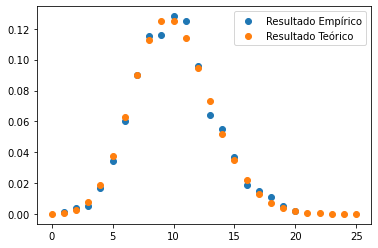

In [12]:
plt.scatter(frequencias_relativas.index, frequencias_relativas, label="Resultado Empírico")
plt.scatter(range(26), probabilidades_teoricas, label="Resultado Teórico")
plt.legend()
plt.show()

<div id="ex-extra"></div>
<div id="ppf"></div>

### EXERCÍCIO EXTRA

A cada erupção cada kabuniano tem uma chance $p=10^{-3}$ de ficar azul. Neste caso ele tem que ir ao Grande Hospital de Kabum para voltar a cor normal. Existem 100 mil kabunianos. Qual o número de vagas no hospital para atender corretamente a todos os kabunianos necessitados em 99% das erupções? 

**Dica 1:** reflita sobre qual distribuição deve ser utilizada para modelar essa questão;
**Dica 2:** métodos `.ppf` calculam o inverso dos métodos `.cdf`. Por exemplo: `stats.poisson.cdf(15, mu=10)` é aproximadamente `0.95` e `stats.poisson.ppf(0.95, mu=10)` é aproximadamente `15`.

*Resposta esperada: 124.0*

In [16]:
print(stats.poisson.ppf(0.99, mu))
print(stats.binom.mean(1e6, 1e-3))

18.0
1000.0


<div id="comandos"></div>

___

## Lista de comandos utilizados neste notebook

Os seguintes comandos foram utilizados neste jupyter notebook. Para facilitar sua consulta, escreva um resumo do que cada um deles faz:

- [`.pmf`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.mean`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.var`](#pmf-stats): ESCREVA AQUI O RESUMO
- [`.ppf`](#ppf): ESCREVA AQUI O RESUMO